In [1]:
import torch

print(f"PyTorch Version: {torch.__version__}")


PyTorch Version: 2.1.2+cu118


# Устновка библиотек

In [2]:
import os

install_cmd_gpu = """
pip install torch==2.1.2+cu118 torchvision==0.16.2+cu118 torchaudio==2.1.2+cu118 --index-url https://download.pytorch.org/whl/cu118 -q &&
pip install mmdet -q &&
pip install ultralytics -q &&
pip install cython -q &&
pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI --no-build-isolation -q &&
pip install scipy albumentations opencv-python-headless matplotlib seaborn pandas pillow wget gdown -q &&
pip install mmcv==2.1.0 -f https://download.openmmlab.com/mmcv/dist/cu118/torch2.1/index.html -q &&
pip install "numpy<2.0.0" -q
"""
install_cmd_cpu = """
pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 -q &&
pip install mmdet -q &&
pip install ultralytics -q &&
pip install cython -q &&
pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI --no-build-isolation -q &&
pip install scipy albumentations opencv-python-headless matplotlib seaborn pandas pillow wget gdown -q &&
pip install mmcv==2.1.0 -f https://download.openmmlab.com/mmcv/dist/cu118/torch2.1/index.html -q &&
pip install "numpy<2.0.0" -q
"""

install_cmd = install_cmd_gpu
os.system(install_cmd)

print("✅ Установка завершена. Пора сделать Kernel RESTART")


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


✅ Установка завершена. Пора сделать Kernel RESTART


In [4]:
import numpy as np
print(f"✅ numpy версия: {np.__version__}")

import torch
print(f"✅ torch версия: {torch.__version__}")

# Проверим, что torch 2.1.x
assert torch.__version__.startswith("2.1"), f"torch {torch.__version__} не подходит для mmcv 2.1.0"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image, ImageDraw, ImageFont
import xml.etree.ElementTree as ET
from collections import Counter, defaultdict
import random
import wget
import zipfile
import shutil
import urllib.request
import glob
import gdown
import warnings
warnings.filterwarnings("ignore")

# MMDetection
import mmcv
from mmengine.config import Config
from mmengine.runner import Runner
from mmdet.apis import DetInferencer

# YOLOv8
from ultralytics import YOLO

# COCO API
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# Настройка отображения
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("✅ Все библиотеки импортированы (torch 2.1.2, mmcv 2.1.0, numpy 1.26.4)")

✅ numpy версия: 1.26.4
✅ torch версия: 2.1.2+cu118
✅ Все библиотеки импортированы (torch 2.1.2, mmcv 2.1.0, numpy 1.26.4)


In [5]:
import torch
import mmcv
import mmdet
from mmcv.ops import RoIAlign, nms
import numpy as np


print(f"PyTorch Version: {torch.__version__}")
print(f"MMCV Version: {mmcv.__version__}")
print(f"MMDet Version: {mmdet.__version__}")

# Патч для совместимости с pycocotools
if not hasattr(np, 'float'):
    np.float = float
if not hasattr(np, 'int'):
    np.int = int
if not hasattr(np, 'bool'):
    np.bool = bool

print(f"Numpy Version: {np.__version__}")


PyTorch Version: 2.1.2+cu118
MMCV Version: 2.1.0
MMDet Version: 3.3.0
Numpy Version: 1.26.4


In [6]:
try:
 # Тест импорта реестра моделей
 from mmdet.registry import MODELS
 # Тест импорта реестра метрик
 from mmdet.registry import METRICS
 print("✅ MMDetection Registry working")
except Exception as e:
 print(f"❌ MMDetection Init Failed: {e}")


✅ MMDetection Registry working


In [7]:
METRICS

                                                Registry of metric                                                 
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Names                       ┃ Objects                                                                           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ COCOCaptionMetric           │ <class 'mmdet.evaluation.metrics.coco_caption_metric.COCOCaptionMetric'>          │
│ CityScapesMetric            │ <class 'mmdet.evaluation.metrics.cityscapes_metric.CityScapesMetric'>             │
│ CocoMetric                  │ <class 'mmdet.evaluation.metrics.coco_metric.CocoMetric'>                         │
│ CocoOccludedSeparatedMetric │ <class                                                                            │
│                             │ 'mmdet.evaluation.metrics.coco_occluded_

In [8]:
MODELS

 Registry of model 
┏━━━━━━━┳━━━━━━━━━┓
┃ Names ┃ Objects ┃
┡━━━━━━━╇━━━━━━━━━┩
└───────┴─────────┘

Пока библиотека не использовалась, поэтому зарегистрированных моделей и метрик нет

# Скачивание и распаковка датасета minecraft.zip

Скачаем архив с диска и разархивируем

# Интеференс модели FCOS до обучения

### Проверка изображения файла jpg

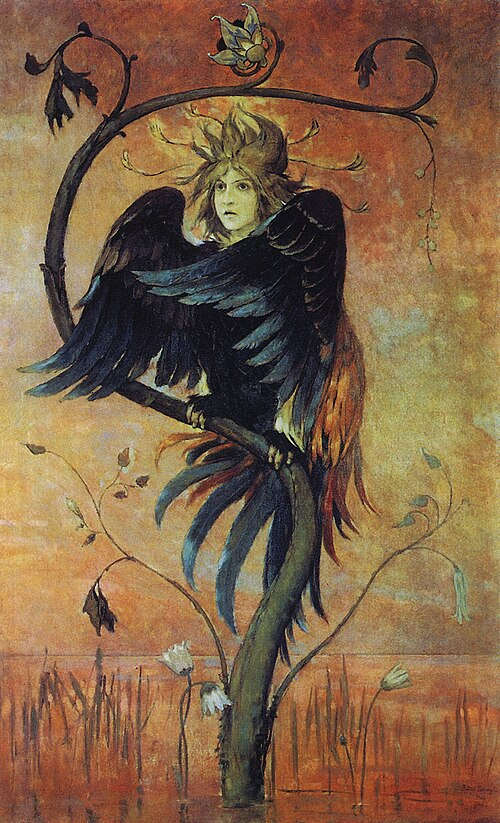

In [5]:
# Show the output image
from PIL import Image
demo_img='/home/jupyter/project/Gamaun.jpg'
Image.open(demo_img)

In [9]:
import os
# Основная директория проекта
base_dir = 'mmdetection'

# Структура проекта
folders_to_create = [
    'datasets/minecraft/annotations',
    'datasets/minecraft/images/train',
    'datasets/minecraft/images/val',
    'datasets/minecraft/images/test',
    'datasets/minecraft/labels/train',
    'datasets/minecraft/labels/val',
    'datasets/minecraft/labels/test',
    'configs/fcos',
    'artifacts/fcos',
    'artifacts/yolo',
    'artifacts/metrics',
    'artifacts/inference/fcos',
    'artifacts/inference/yolo',
    'artifacts/videos',
    'checkpoints'
]

# Создаём все папки (если не существуют)
for folder in folders_to_create:
    full_path = os.path.join(base_dir, folder)
    if not os.path.exists(full_path):
        os.makedirs(full_path, exist_ok=True)
        print(f"✅ Папка создана: {full_path}")
    else:
        print(f"ℹ️  Папка уже существует: {full_path}")

print("\n✅ Структура проекта полностью создана / проверена")

✅ Папка создана: mmdetection/datasets/minecraft/annotations
✅ Папка создана: mmdetection/datasets/minecraft/images/train
✅ Папка создана: mmdetection/datasets/minecraft/images/val
✅ Папка создана: mmdetection/datasets/minecraft/images/test
✅ Папка создана: mmdetection/datasets/minecraft/labels/train
✅ Папка создана: mmdetection/datasets/minecraft/labels/val
✅ Папка создана: mmdetection/datasets/minecraft/labels/test
✅ Папка создана: mmdetection/configs/fcos
✅ Папка создана: mmdetection/artifacts/fcos
✅ Папка создана: mmdetection/artifacts/yolo
✅ Папка создана: mmdetection/artifacts/metrics
✅ Папка создана: mmdetection/artifacts/inference/fcos
✅ Папка создана: mmdetection/artifacts/inference/yolo
✅ Папка создана: mmdetection/artifacts/videos
ℹ️  Папка уже существует: mmdetection/checkpoints

✅ Структура проекта полностью создана / проверена


### Создание конфигурации FCOS для обучения

In [11]:
cd mmdetection

/home/jupyter/project/mmdetection


In [13]:
CLASSES = ['bee', 'chicken', 'cow', 'creeper', 'enderman', 'fox', 'frog', 'ghast',
'goat', 'llama', 'pig', 'sheep', 'skeleton', 'spider', 'turtle', 'wolf', 'zombie' ]
print("Классы:", CLASSES)
txt_path='datasets/minecraft/annotations/classes.txt'
with open(txt_path, 'w') as f:
     for name in CLASSES:
         f.write(f"{name} ")

Классы: ['bee', 'chicken', 'cow', 'creeper', 'enderman', 'fox', 'frog', 'ghast', 'goat', 'llama', 'pig', 'sheep', 'skeleton', 'spider', 'turtle', 'wolf', 'zombie']


In [22]:
fcos_config = f'''
_base_ = [
    'mmdet::_base_/datasets/coco_detection.py',
    'mmdet::_base_/schedules/schedule_1x.py',
    'mmdet::_base_/default_runtime.py'
]

# Модель
model = dict(
    type='FCOS',
    data_preprocessor=dict(
        type='DetDataPreprocessor',
        mean=[103.530, 116.280, 123.675],
        std=[1.0, 1.0, 1.0],
        bgr_to_rgb=False,
        pad_size_divisor=32),
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe',
        init_cfg=dict(
            type='Pretrained',
            checkpoint='open-mmlab://detectron2/resnet50_caffe')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        start_level=1,
        add_extra_convs='on_output',
        num_outs=5,
        relu_before_extra_convs=True),
    bbox_head=dict(
        type='FCOSHead',
        num_classes={len(CLASSES)},
        in_channels=256,
        stacked_convs=4,
        feat_channels=256,
        strides=[8, 16, 32, 64, 128],
        norm_on_bbox=True,
        centerness_on_reg=True,
        dcn_on_last_conv=False,
        conv_bias=True,
        loss_cls=dict(
            type='FocalLoss',
            use_sigmoid=True,
            gamma=2.0,
            alpha=0.25,
            loss_weight=1.0),
        loss_bbox=dict(type='GIoULoss', loss_weight=1.0),
        loss_centerness=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0)),
    test_cfg=dict(
        nms_pre=1000,
        min_bbox_size=0,
        score_thr=0.05,
        nms=dict(type='nms', iou_threshold=0.5),
        max_per_img=100))

# Данные
data_root = 'datasets/minecraft/'
metainfo = dict(classes={CLASSES!r})

train_dataloader = dict(
    batch_size=2,
    num_workers=2,
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        ann_file='annotations/train.json',
        data_prefix=dict(img='images/train/'),
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='LoadAnnotations', with_bbox=True),
            dict(type='Resize', scale=(512, 512), keep_ratio=False),
            dict(type='RandomFlip', prob=0.5),
            dict(type='PackDetInputs')
        ]))

val_dataloader = dict(
    batch_size=2,
    num_workers=2,
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        ann_file='annotations/val.json',
        data_prefix=dict(img='images/val/'),
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='Resize', scale=(512, 512), keep_ratio=False),
            dict(type='LoadAnnotations', with_bbox=True),
            dict(type='PackDetInputs')
        ]))

test_dataloader = val_dataloader

# Оценка
val_evaluator = dict(
    type='CocoMetric',
    ann_file=data_root + 'annotations/val.json',
    metric='bbox',
    format_only=False)
test_evaluator = val_evaluator

# Обучение
train_cfg = dict(type='EpochBasedTrainLoop', max_epochs=12, val_interval=1)
val_cfg = dict(type='ValLoop')
test_cfg = dict(type='TestLoop')

# Оптимизатор
optim_wrapper = dict(
    type='OptimWrapper',
    optimizer=dict(type='SGD', lr=0.001, momentum=0.9, weight_decay=0.0001))

# Планировщик
param_scheduler = [
    dict(type='LinearLR', start_factor=0.001, by_epoch=False, begin=0, end=500),
    dict(type='MultiStepLR', by_epoch=True, milestones=[8, 11], gamma=0.1)
]

# Чекпоинты
default_hooks = dict(
    checkpoint=dict(type='CheckpointHook', interval=1, max_keep_ckpts=3),
    logger=dict(type='LoggerHook', interval=50))

# FP16
fp16 = dict(loss_scale='dynamic')
'''

with open('configs/fcos/fcos_minecraft.py', 'w') as f:
    f.write(fcos_config)

print("✅ Конфиг fcos_minecraft.py создан")

✅ Конфиг fcos_minecraft.py создан


### Скачиваем веса для модели из проекта

In [16]:
import os
import wget


checkpoint_dir = 'checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_url = 'https://download.openmmlab.com/mmdetection/v2.0/fcos/fcos_r50_caffe_fpn_gn-head_1x_coco/fcos_r50_caffe_fpn_gn-head_1x_coco-821213aa.pth'
checkpoint_file_name = 'fcos_r50_caffe_fpn_gn-head_1x_coco.pth'
checkpoint_path = os.path.join(checkpoint_dir, checkpoint_file_name)

if os.path.exists(checkpoint_path):
    print(f"✅ Чекпоинт уже существует: {checkpoint_path}")
    # Проверим размер и хэш
    size = os.path.getsize(checkpoint_path)
    print(f"📏 Размер файла: {size / (1024**2):.2f} MB")

    if size < 100 * 1024 * 1024:  # 100 MB
        print("❌ Размер файла слишком мал — удаляем и скачиваем заново.")
        os.remove(checkpoint_path)
    else:
        print("✅ Размер файла корректный — продолжаем без скачивания.")
else:
    print(f"📥 Скачивание чекпоинта FCOS из:\n  {checkpoint_url}")
    wget.download(checkpoint_url, checkpoint_path)
    print(f"\n✅ Чекпоинт FCOS скачан и сохранён в:\n  {checkpoint_path}")

    # Проверим размер после скачивания
    size = os.path.getsize(checkpoint_path)
    print(f"📏 Размер файла: {size / (1024**2):.2f} MB")

    if size < 100 * 1024 * 1024:
        raise ValueError("❌ Файл скачался некорректно (слишком маленький)")
    else:
        print("✅ Размер файла корректный")

✅ Чекпоинт уже существует: checkpoints/fcos_r50_caffe_fpn_gn-head_1x_coco.pth
📏 Размер файла: 123.47 MB
✅ Размер файла корректный — продолжаем без скачивания.


### Инференс до обучения

Loads checkpoint by local backend from path: checkpoints/fcos_r50_caffe_fpn_gn-head_1x_coco.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.conv_cls.weight: copying a param with shape torch.Size([80, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([17, 256, 3, 3]).
size mismatch for bbox_head.conv_cls.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([17]).
missing keys in source state_dict: bbox_head.cls_convs.0.conv.bias, bbox_head.cls_convs.1.conv.bias, bbox_head.cls_convs.2.conv.bias, bbox_head.cls_convs.3.conv.bias, bbox_head.reg_convs.0.conv.bias, bbox_head.reg_convs.1.conv.bias, bbox_head.reg_convs.2.conv.bias, bbox_head.reg_convs.3.conv.bias



Output()

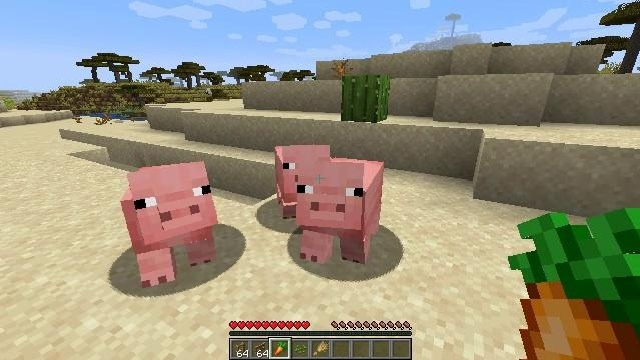

In [20]:
from PIL import Image
from mmdet.apis import DetInferencer

# Choose to use a config
config_path = 'configs/fcos/fcos_minecraft.py' # внезапно файл, который сочинили

# Setup a checkpoint file to load
checkpoint = 'checkpoints/fcos_r50_caffe_fpn_gn-head_1x_coco.pth'

# Initialize the DetInferencer
inferencer = DetInferencer(model=config_path, weights=checkpoint)

# Perform inference
img_path = 'datasets/minecraft/images/valid/'
img_file = 'desert_-_pig_1375_jpg.rf.bddcc2b2bd1ccf7330cd274d684fd4e2.jpg'
img=img_path + img_file
out_dir='artifacts/fcos_e0'

inferencer(img, out_dir=out_dir)
Image.open(out_dir + '/vis/' + img_file)

# Обучение модели FCOS

In [25]:
from mmengine.runner import Runner
from mmengine.config import Config

# Загружаем конфиг
config_file = 'configs/fcos/fcos_minecraft.py'
cfg = Config.fromfile(config_file)

# Обновляем пути
cfg.work_dir = 'artifacts/fcos'
cfg.default_hooks.checkpoint.out_dir = cfg.work_dir

# Запускаем обучение
print("🚀 Запуск обучения FCOS...")
runner = Runner.from_cfg(cfg)
runner.train()

print("✅ Обучение FCOS завершено")

🚀 Запуск обучения FCOS...
01/11 14:09:53 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1560978443
    GPU 0: Tesla V100-PCIE-32GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.2+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture fl

# Используем для референса сохраненный файл

In [28]:
from PIL import Image
from mmdet.apis import DetInferencer

# Choose to use a config
config_path = 'configs/fcos/fcos_minecraft.py' # внезапно файл, который сочинили

# Setup a checkpoint file to load
checkpoint = 'artifacts/fcos/fcos/epoch_12.pth'

# Initialize the DetInferencer
inferencer = DetInferencer(model=config_path, weights=checkpoint)


Loads checkpoint by local backend from path: artifacts/fcos/fcos/epoch_12.pth
01/11 14:36:11 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


Output()

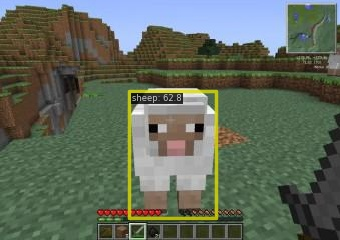

In [46]:
img_path = 'datasets/minecraft/images/val/'
img_file='-44-_jpg.rf.e6243125f164a3a2570d3592e36cf21c.jpg'
img=img_path + img_file
out_dir='artifacts/inference/fcos'

inferencer(img, out_dir=out_dir)
Image.open(out_dir + '/vis/' + img_file)

Output()

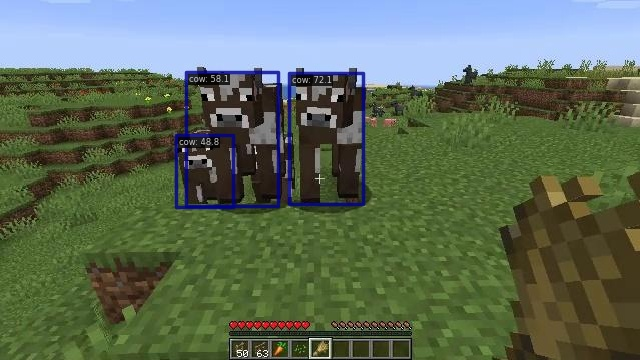

In [47]:
img_path = 'datasets/minecraft/images/val/'
img_file='grass_desert_-_cow_3_1484_jpg.rf.8d737656c6c7d34c9e3294a011ccdf65.jpg'
#img_path = 'datasets/minecraft/images/test/'
#img_file='grass_desert_-_cow_3_1213_jpg.rf.d65a530b6d3f30f6709afd51032ae0c6.jpg'
img=img_path + img_file

inferencer(img, out_dir=out_dir)
Image.open(out_dir + '/vis/' + img_file)

Output()

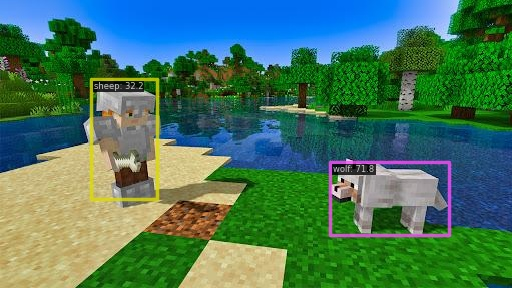

In [41]:
# Perform inference
img_path = 'datasets/minecraft/images/train/'
img_file='wolf12_jpg.rf.c26d5b06eae27a9ec8f93e9ade0f54dc.jpg'
img=img_path + img_file

inferencer(img, out_dir=out_dir)
Image.open(out_dir + '/vis/' + img_file)

Output()

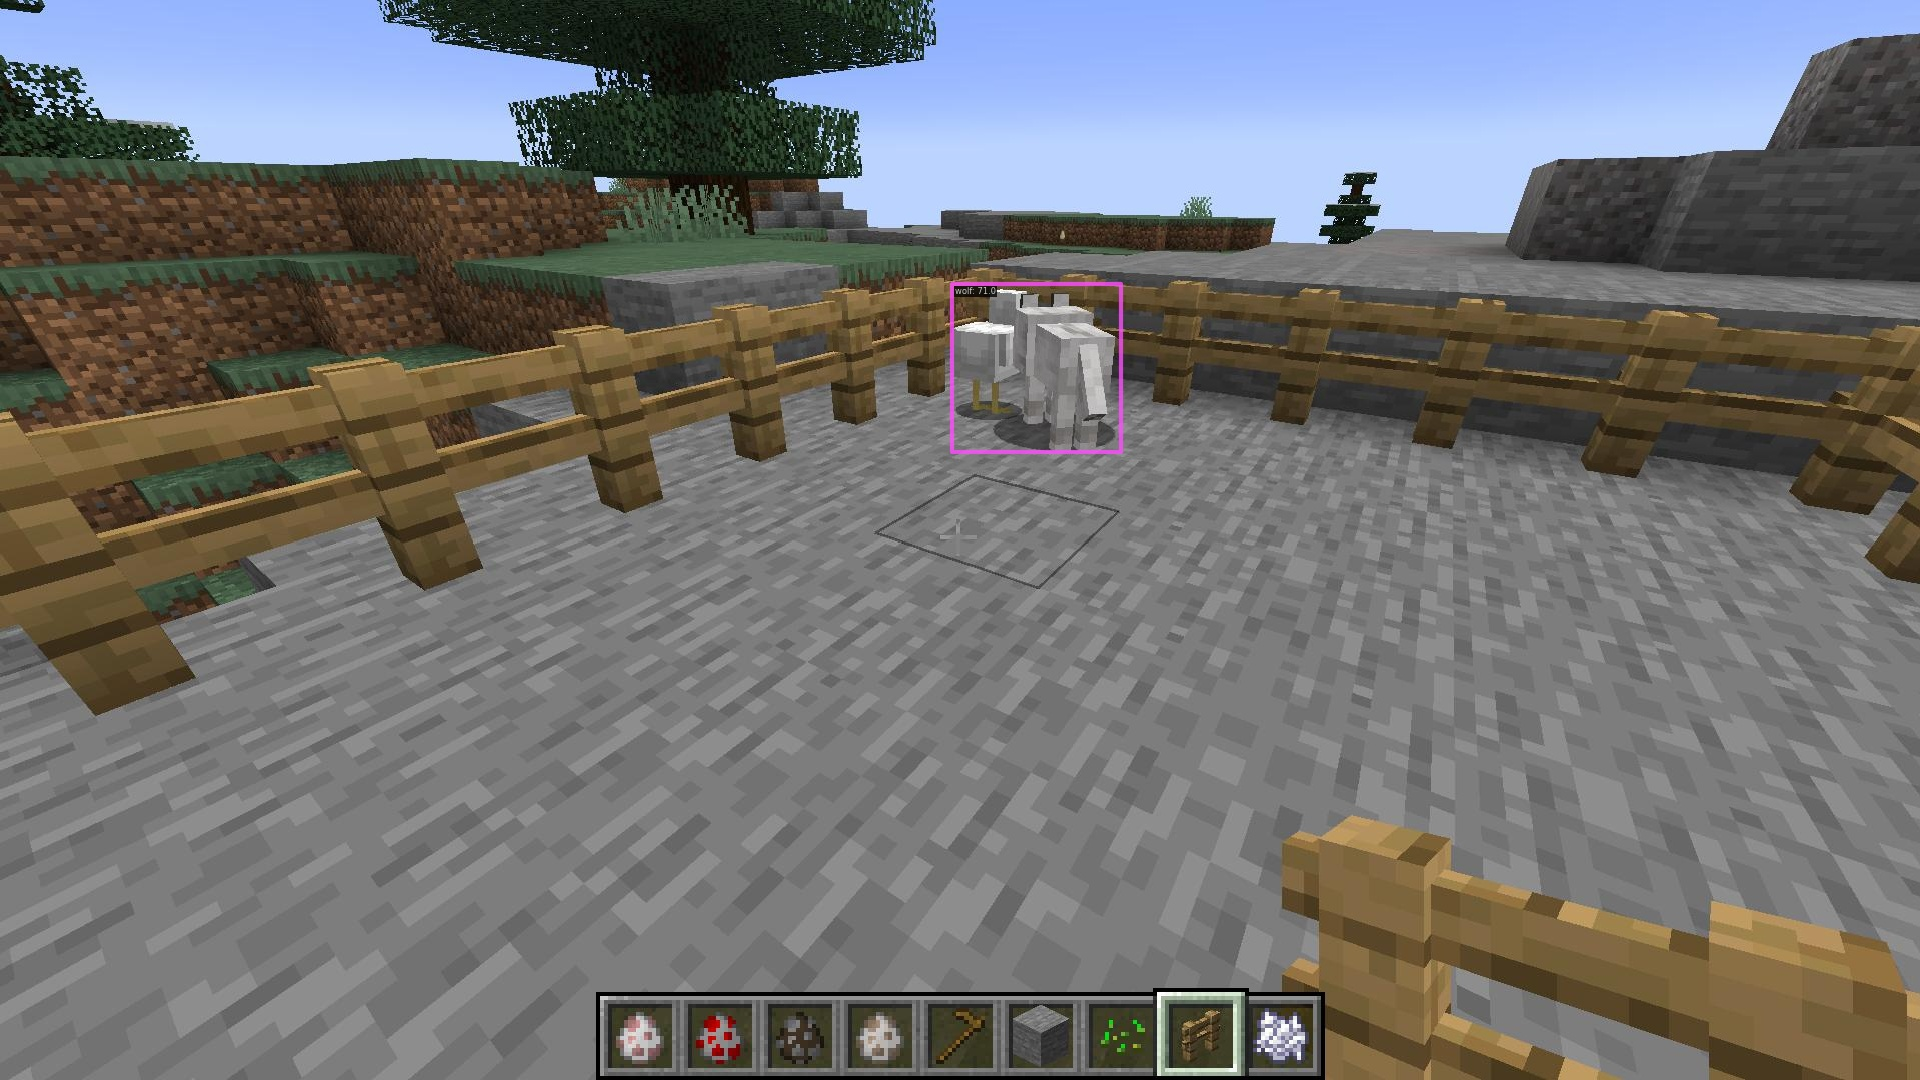

In [48]:
# Perform inference
img_path = 'datasets/minecraft/images/train/'
img_file='Minecraft-1-19-2-2022-11-29-3_44_01_png.rf.ab9bc44577337769e2b9da0bc4e3d6c8.jpg'
img=img_path + img_file

inferencer(img, out_dir=out_dir)
Image.open(out_dir + '/vis/' + img_file)

Output()

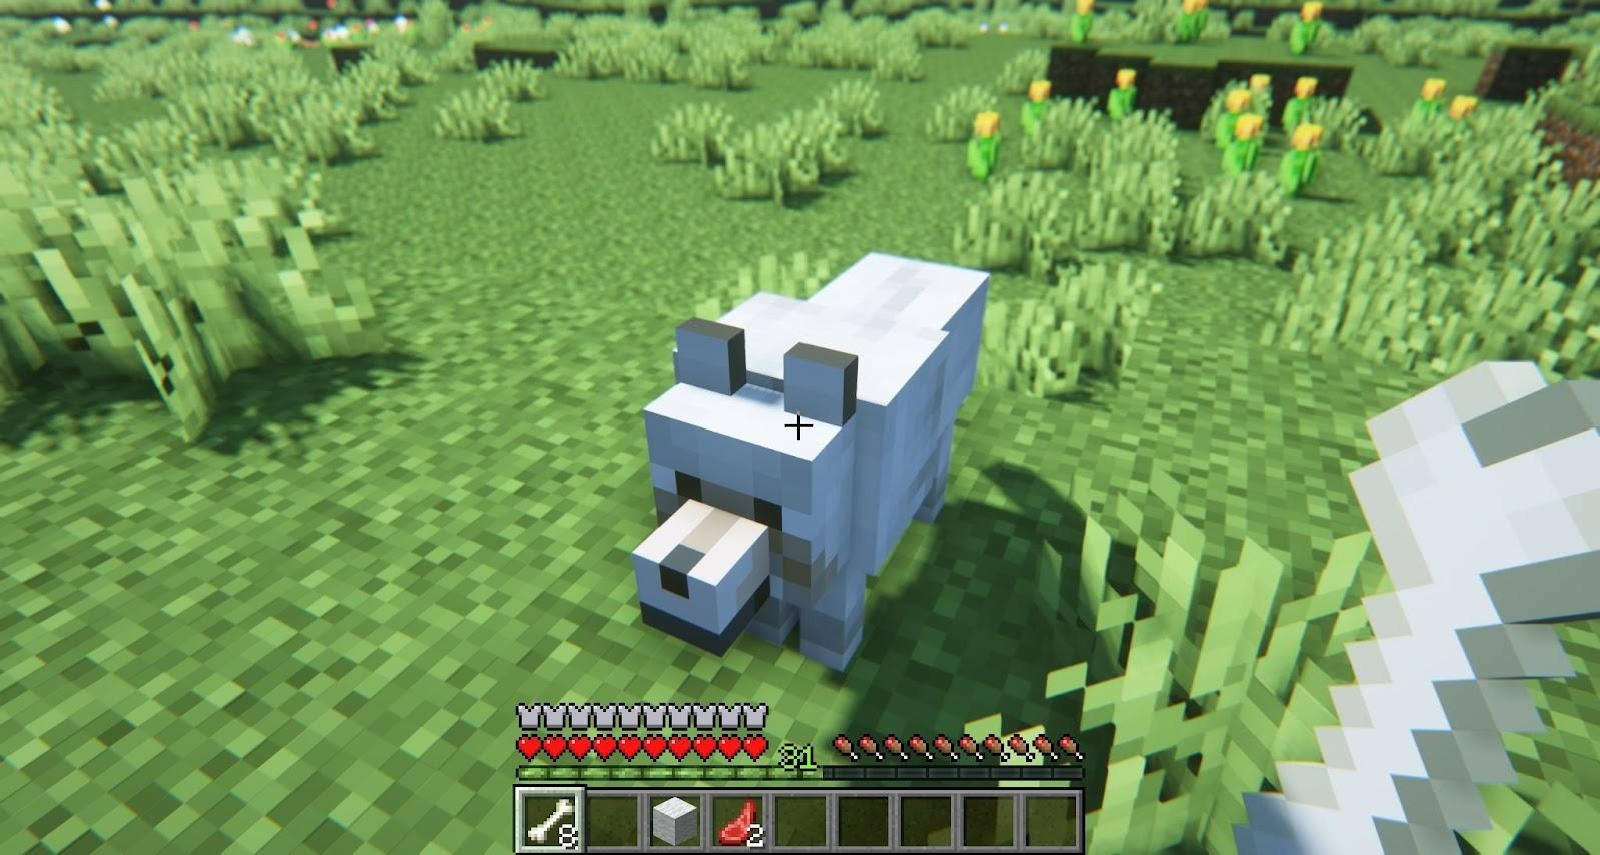

In [49]:
# Perform inference
#img_path = 'datasets/minecraft/images/train/'
#img_file='wolf12_jpg.rf.c26d5b06eae27a9ec8f93e9ade0f54dc.jpg'
img_path = 'datasets/minecraft/images/test/'
img_file='wolf21_jpg.rf.0725f28587c88d80f546cbf3bbdb4c29.jpg'
img=img_path + img_file

inferencer(img, out_dir=out_dir)
Image.open(out_dir + '/vis/' + img_file)

# Графики результатов обучения

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from pathlib import Path
import re

def parse_fcos_log(log_path):
    """Парсит лог-файл FCOS и возвращает DataFrame"""
    train_data = []
    val_data = []

    with open(log_path, 'r') as f:
        lines = f.readlines()

    # Регулярные выражения для парсинга
    train_pattern = r'Epoch\(train\)\s+\[(\d+)\]\[.*?\]\s+lr:\s+([\d.e+-]+).*?loss:\s+([\d.]+)\s+loss_cls:\s+([\d.]+)\s+loss_bbox:\s+([\d.]+)\s+loss_centerness:\s+([\d.]+)'
    val_pattern = r'Epoch\(val\)\s+\[(\d+)\].*?coco/bbox_mAP:\s+([\d.]+)\s+coco/bbox_mAP_50:\s+([\d.]+)\s+coco/bbox_mAP_75:\s+([\d.]+)\s+coco/bbox_mAP_s:\s+([\d.]+)\s+coco/bbox_mAP_m:\s+([\d.]+)\s+coco/bbox_mAP_l:\s+([\d.]+)'

    for line in lines:
        # Парсим тренировочные данные
        train_match = re.search(train_pattern, line)
        if train_match:
            try:
                epoch = int(train_match.group(1))
                lr = float(train_match.group(2))
                loss = float(train_match.group(3))
                loss_cls = float(train_match.group(4))
                loss_bbox = float(train_match.group(5))
                loss_centerness = float(train_match.group(6))

                # Находим информацию о шаге
                step_match = re.search(r'\[(\d+)/(\d+)\]', line)
                if step_match:
                    step = int(step_match.group(1))
                    total_steps = int(step_match.group(2))
                    global_step = step + (epoch - 1) * total_steps
                else:
                    global_step = len(train_data) + 1

                train_data.append({
                    'step': global_step,
                    'epoch': epoch,
                    'loss': loss,
                    'loss_cls': loss_cls,
                    'loss_bbox': loss_bbox,
                    'loss_centerness': loss_centerness,
                    'lr': lr
                })
            except (ValueError, IndexError):
                continue

        # Парсим валидационные данные
        val_match = re.search(val_pattern, line)
        if val_match:
            try:
                epoch = int(val_match.group(1))
                mAP = float(val_match.group(2))
                mAP_50 = float(val_match.group(3))
                mAP_75 = float(val_match.group(4))
                mAP_s = float(val_match.group(5))
                mAP_m = float(val_match.group(6))
                mAP_l = float(val_match.group(7))

                val_data.append({
                    'epoch': epoch,
                    'mAP': mAP,
                    'mAP_50': mAP_50,
                    'mAP_75': mAP_75,
                    'mAP_s': mAP_s,
                    'mAP_m': mAP_m,
                    'mAP_l': mAP_l
                })
            except (ValueError, IndexError):
                continue

    # Создаем DataFrame
    train_df = pd.DataFrame(train_data)
    val_df = pd.DataFrame(val_data)

    # Удаляем дубликаты и сортируем
    if not train_df.empty:
        train_df = train_df.drop_duplicates(subset=['step']).sort_values('step')
    if not val_df.empty:
        val_df = val_df.drop_duplicates(subset=['epoch']).sort_values('epoch')

    return train_df, val_df


In [43]:
log_path = 'artifacts/fcos/20260111_140953'

train_df, val_df = parse_fcos_log(log_path)

print(f"Training records: {len(train_df)}")
print(f"Validation records: {len(val_df)}")


IsADirectoryError: [Errno 21] Is a directory: 'artifacts/fcos/20260111_140953'

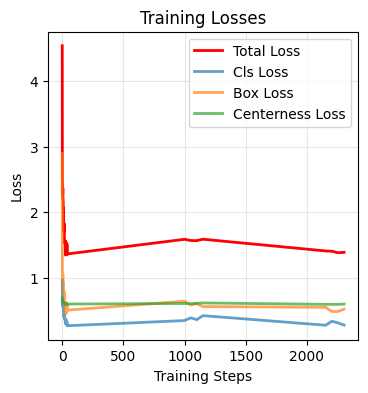

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(train_df['step'], train_df['loss'], label='Total Loss', linewidth=2, color='red')
plt.plot(train_df['step'], train_df['loss_cls'], label='Cls Loss', linewidth=2, alpha=0.7)
plt.plot(train_df['step'], train_df['loss_bbox'], label='Box Loss', linewidth=2, alpha=0.7)
plt.plot(train_df['step'], train_df['loss_centerness'], label='Centerness Loss', linewidth=2, alpha=0.7)

plt.title('Training Losses')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)
plt.legend();


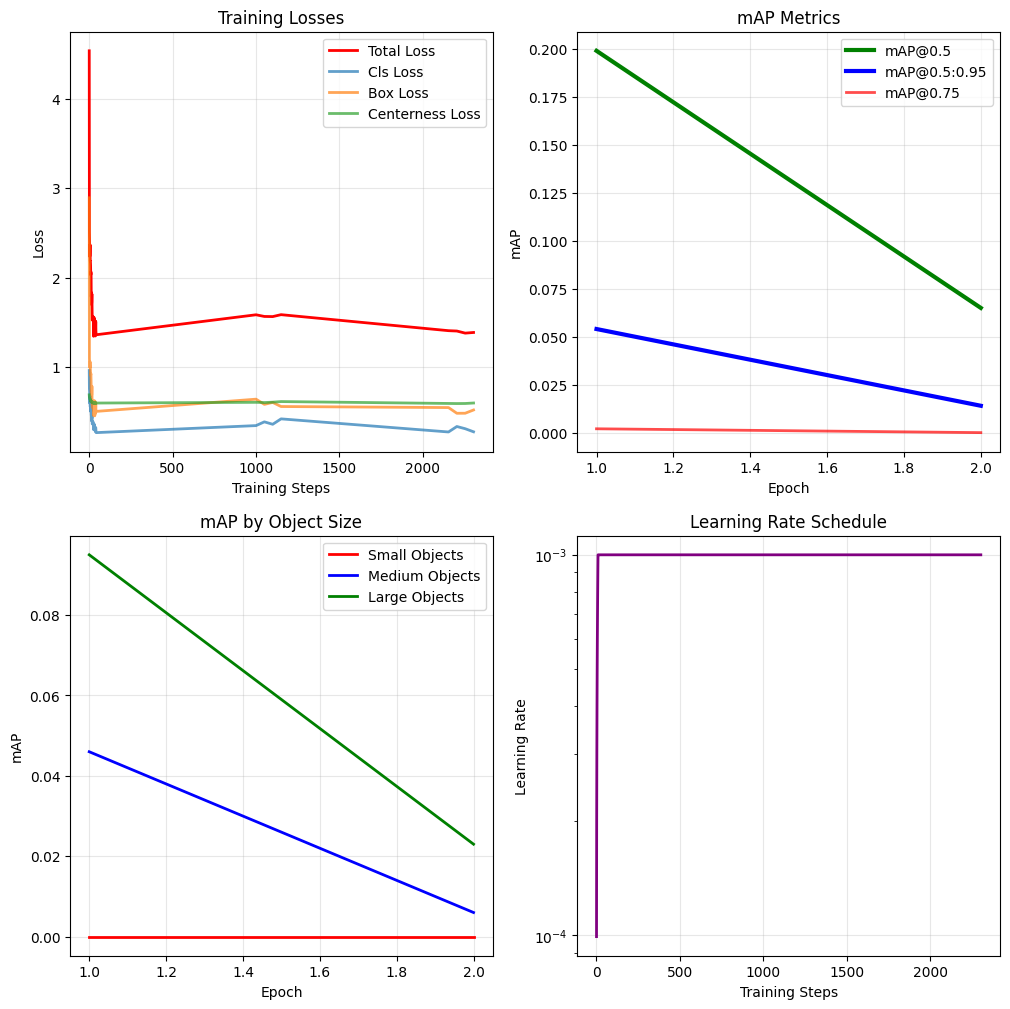

In [ ]:
if train_df.empty or val_df.empty:
        print("Not enough data for visualization")
else:
        fig, axes = plt.subplots(2, 2, figsize=(12, 12))
        #fig.suptitle(f'FCOS Training Analysis - {dir_name}', fontsize=16, fontweight='bold')

        # 1. График потерь обучения
        axes[0, 0].plot(train_df['step'], train_df['loss'], label='Total Loss', linewidth=2, color='red')
        axes[0, 0].plot(train_df['step'], train_df['loss_cls'], label='Cls Loss', linewidth=2, alpha=0.7)
        axes[0, 0].plot(train_df['step'], train_df['loss_bbox'], label='Box Loss', linewidth=2, alpha=0.7)
        axes[0, 0].plot(train_df['step'], train_df['loss_centerness'], label='Centerness Loss', linewidth=2, alpha=0.7)
        axes[0, 0].set_title('Training Losses')
        axes[0, 0].set_xlabel('Training Steps')
        axes[0, 0].set_ylabel('Loss')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # 2. График метрик mAP
        axes[0, 1].plot(val_df['epoch'], val_df['mAP_50'], label='mAP@0.5', linewidth=3, color='green')
        axes[0, 1].plot(val_df['epoch'], val_df['mAP'], label='mAP@0.5:0.95', linewidth=3, color='blue')
        axes[0, 1].plot(val_df['epoch'], val_df['mAP_75'], label='mAP@0.75', linewidth=2, color='red', alpha=0.7)
        axes[0, 1].set_title('mAP Metrics')
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('mAP')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # 3. График mAP по размерам объектов
        axes[1, 0].plot(val_df['epoch'], val_df['mAP_s'], label='Small Objects', linewidth=2, color='red')
        axes[1, 0].plot(val_df['epoch'], val_df['mAP_m'], label='Medium Objects', linewidth=2, color='blue')
        axes[1, 0].plot(val_df['epoch'], val_df['mAP_l'], label='Large Objects', linewidth=2, color='green')
        axes[1, 0].set_title('mAP by Object Size')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('mAP')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # 4. График Learning Rate
        axes[1, 1].plot(train_df['step'], train_df['lr'], label='Learning Rate', linewidth=2, color='purple')
        axes[1, 1].set_title('Learning Rate Schedule')
        axes[1, 1].set_xlabel('Training Steps')
        axes[1, 1].set_ylabel('Learning Rate')
        axes[1, 1].set_yscale('log')
        axes[1, 1].grid(True, alpha=0.3)